In [5]:
import numpy as np

try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5, 0, 4, ..., 4, 5, 6], dtype=int8))

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
x,y=mnist['data'],mnist['target']

In [8]:
x.shape

(70000, 784)

In [9]:
y.shape

(70000,)

In [10]:
y[5000]

7

In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

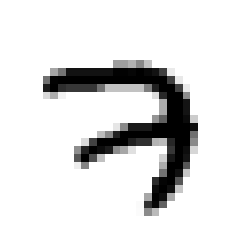

In [12]:
some_digit= x[5000]
some_digit_image= some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [13]:
y[5000]

7

In [14]:
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]

In [15]:
import numpy as np
shuffle_index= np.random.permutation(60000)
x_train,y_train=x_train[shuffle_index],y_train[shuffle_index]

In [16]:
y_train_7= (y_train==7)
y_test_7=(y_test==7)

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
sgd_clf= SGDClassifier(random_state=42)
sgd_clf.fit(x_train,y_train_7)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
sgd_clf.predict([some_digit])

array([ True])

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [21]:
skfolds= StratifiedKFold(n_splits=3,random_state=42)

In [22]:
for train_index, test_index in skfolds.split(x_train,y_train_7):
    clone_clf= clone(sgd_clf)
    x_train_folds= x_train[train_index]
    y_train_folds= (y_train_7[train_index])
    x_test_folds= x_train[test_index]
    y_test_folds= (y_train_7[test_index])
    
    
    clone_clf.fit(x_train_folds,y_train_folds)
    y_pred= clone_clf.predict(x_test_folds)
    n_correct=sum(y_pred==y_test_folds)
    print(n_correct/len(y_pred))

0.9763511824408779
0.9745
0.9715485774288715


In [23]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_7,cv=3,scoring='accuracy')

array([0.97635118, 0.9745    , 0.97154858])

In [24]:
from sklearn.base import BaseEstimator

class never7classifier(BaseEstimator):
    def fit(self,x,y=None):
        pass
    def predict(self,x):
        return np.zeros((len(x),1),dtype=bool)

In [25]:
never_7_classifier= never7classifier()
cross_val_score(never_7_classifier,x_train,y_train_7,cv=3,scoring='accuracy')

array([0.89475, 0.8954 , 0.8966 ])

In [26]:
from sklearn.model_selection import cross_val_predict

In [27]:
y_train_pred=cross_val_predict(sgd_clf,x_train,y_train_7,cv=3)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_7,y_train_pred)

array([[52924,   811],
       [  741,  5524]], dtype=int64)

In [29]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_7,y_train_pred)

0.8719810576164168

In [30]:
recall_score(y_train_7, y_train_pred)

0.8817238627294494

In [31]:
from sklearn.metrics import f1_score

In [32]:
f1_score(y_train_7,y_train_pred)

0.8768253968253968

In [33]:
y_scores= sgd_clf.decision_function([some_digit])

In [34]:
y_scores

array([165981.7906281])

In [35]:
y_scores=cross_val_predict(sgd_clf,x_train,y_train_7,cv=3,method='decision_function')

In [36]:
y_scores

array([-304024.92780967, -530209.73929658, -327400.50120987, ...,
       -537227.87915044, -361474.71005929, -141179.34280292])

In [37]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_7, y_scores)

In [38]:
def plot_precision_recall_curve(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='recall')
    plt.legend(loc='upper left')
    plt.xlabel('threshold')
    plt.ylim([0,1])

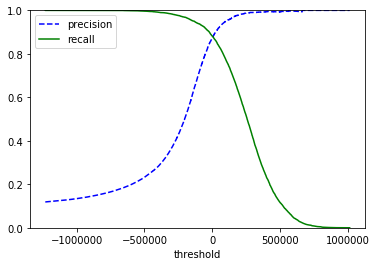

In [39]:
plot_precision_recall_curve(precisions,recalls,thresholds)
plt.show()

In [40]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_train_7,y_scores)

In [41]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

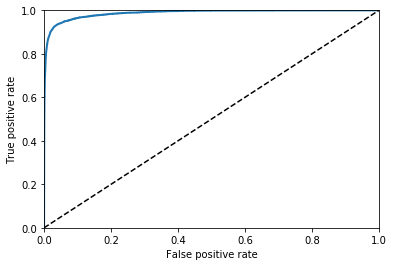

In [42]:
plot_roc_curve(fpr,tpr)
plt.show()

In [43]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_7,y_scores)


0.9871959961951555

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest_clf= RandomForestClassifier(random_state=42)
y_probas_forest= cross_val_predict(forest_clf,x_train,y_train_7,cv=3,method='predict_proba')

In [45]:
y_scores_forest= y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest= roc_curve(y_train_7,y_scores_forest)

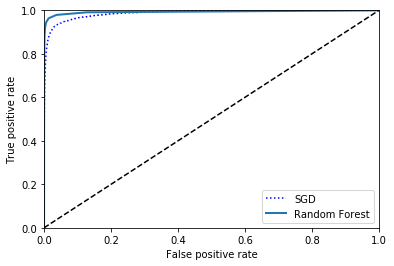

In [46]:
plt.plot(fpr,tpr,'b:',label='SGD')
plot_roc_curve(fpr_forest,tpr_forest,'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [47]:
roc_auc_score(y_train_7,y_scores_forest)

0.99300176422218

In [48]:
y_train_pred_forest = cross_val_predict(forest_clf, x_train, y_train_7, cv=3)
precision_score(y_train_7, y_train_pred_forest)

0.9861061631635197

In [49]:
recall_score(y_train_7,y_train_pred_forest)

0.8836392657621708

In [50]:
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([some_digit])

array([7], dtype=int8)

In [51]:
some_digit_score= sgd_clf.decision_function([some_digit])
some_digit_score

array([[ -919601.92663126, -1009320.33804939,   -69701.23414995,
         -317674.79058666,  -491924.97610966,  -866272.38388679,
         -802770.66438383,   165981.7906281 ,  -277333.86483146,
         -417328.72586226]])

In [52]:
np.argmax(some_digit_score)

7

In [53]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [54]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf= OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train,y_train)
ovo_clf.predict([some_digit])

array([7], dtype=int8)

In [55]:
len(ovo_clf.estimators_)

45

In [56]:
forest_clf.fit(x_train,y_train)
forest_clf.predict([some_digit])

array([7], dtype=int8)

In [57]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0.7, 0.1, 0.1]])

In [58]:
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring='accuracy')

array([0.86517696, 0.87364368, 0.87458119])

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled= scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.91126775, 0.9079454 , 0.90993649])

In [60]:
y_train_pred= cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)
conf_mx= confusion_matrix(y_train,y_train_pred)

In [61]:
conf_mx

array([[5735,    2,   23,    7,   11,   52,   41,    9,   38,    5],
       [   2, 6441,   48,   25,    6,   47,    7,   11,  142,   13],
       [  53,   41, 5341,   93,   77,   30,   92,   57,  158,   16],
       [  49,   37,  140, 5339,    4,  232,   38,   55,  141,   96],
       [  20,   26,   35,    7, 5348,    9,   52,   36,   89,  220],
       [  70,   36,   31,  176,   63, 4634,  108,   28,  171,  104],
       [  38,   25,   47,    2,   43,  104, 5612,    6,   41,    0],
       [  26,   19,   68,   29,   51,    8,    5, 5821,   12,  226],
       [  56,  138,   65,  142,   17,  163,   53,   29, 5034,  154],
       [  45,   32,   25,   87,  152,   31,    2,  221,   76, 5278]],
      dtype=int64)

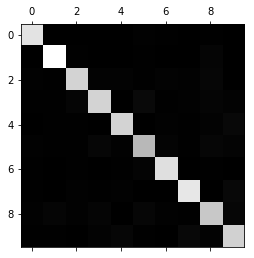

In [62]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [63]:
row_sum= conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx= conf_mx/row_sum

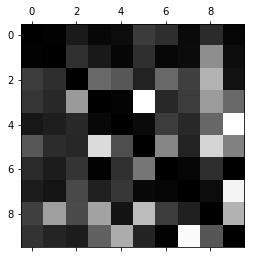

In [64]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [65]:
cl_a,cl_b=3,5
x_aa=x_train[(y_train==cl_a)&(y_train_pred==cl_a)]
x_ab=x_train[(y_train==cl_a)&(y_train_pred==cl_b)]
x_ba= x_train[(y_train==cl_b)&(y_train_pred==cl_a)]
x_bb= x_train[(y_train==cl_b)&(y_train_pred==cl_b)]
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [75]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

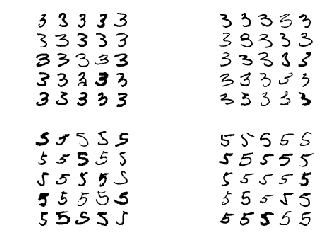

In [72]:
plt.subplot(221);plot_digits(x_aa[:25],images_per_row=5)
plt.subplot(222);plot_digits(x_ab[:25],images_per_row=5)
plt.subplot(223);plot_digits(x_ba[:25],images_per_row=5)
plt.subplot(224);plot_digits(x_bb[:25],images_per_row=5)
plt.show()